Initial Dataset:
   Depth(m)  Total Gas(ppm)  C1(ppm)  C2(ppm)  C 3(ppm)  iC4(ppm)  nC4(ppm)  \
0      1466            4603     1583       19         0         3         1   
1      1467            4585     1587       19         0         3         0   
2      1468            4435     1588       19         0         3         0   
3      1482            5621     2149       26         0         4         1   
4      1485            6197     2957       32         1         5         1   

   iC5(ppm)  nC5(ppm) Gas (Type)  
0         1         1         FG  
1         1         1         FG  
2         1         1         FG  
3         0         1         FG  
4         1         1         FG  

Cleaned Dataset:
   Depth  Total Gas    C1  C2  C3  iC4  nC4  iC5  nC5 Gas Type
0   1466       4603  1583  19   0    3    1    1    1       FG
1   1467       4585  1587  19   0    3    0    1    1       FG
2   1468       4435  1588  19   0    3    0    1    1       FG
3   1482       5621  2149  2

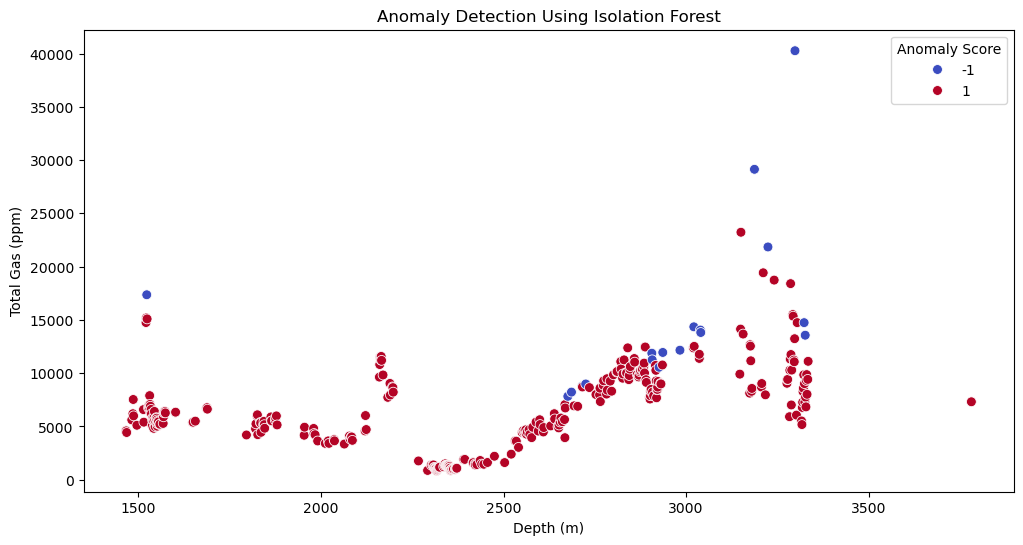

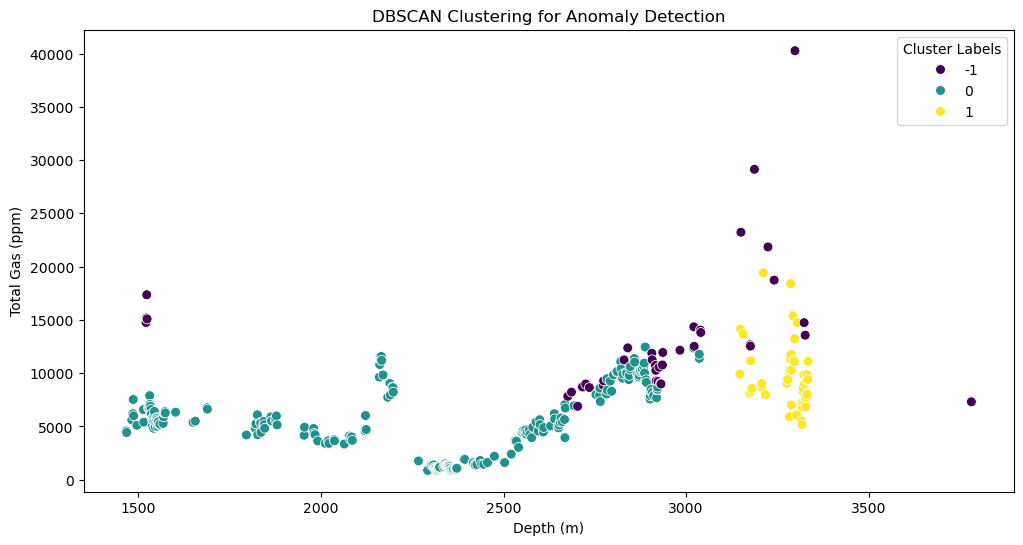


Isolation Forest Anomaly Detection:
anomaly_if
 1    324
-1     18
Name: count, dtype: int64

DBSCAN Clustering:
anomaly_dbscan
 0    258
 1     44
-1     40
Name: count, dtype: int64

Silhouette Score for DBSCAN: 0.31

Results saved to 'Anomaly_Detection_Results.csv'


In [47]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Loading the dataset from GitHub
url = "https://raw.githubusercontent.com/amolsriv/Oil-and-Gas-Projects/main/GAS%20Peaks-Drilling_Well.csv"
data = pd.read_csv(url)

# Displaying initial rows for inspection
print("Initial Dataset:")
print(data.head())

# Renaming columns for consistency
data.columns = ['Depth', 'Total Gas', 'C1', 'C2', 'C3', 'iC4', 'nC4', 'iC5', 'nC5', 'Gas Type']

# Converting numeric columns to appropriate data types
numeric_cols = ['Depth', 'Total Gas', 'C1', 'C2', 'C3', 'iC4', 'nC4', 'iC5', 'nC5']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Dropping rows with missing values
data = data.dropna()

# Displaying cleaned dataset
print("\nCleaned Dataset:")
print(data.head())

# Standardizing the numeric features for ML models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_cols])


# Unsupervised Learning: Isolation Forest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data['anomaly_if'] = isolation_forest.fit_predict(X_scaled)

# Visualizing anomalies detected by Isolation Forest
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Depth', y='Total Gas', hue='anomaly_if', palette='coolwarm', s=50)
plt.title('Anomaly Detection Using Isolation Forest')
plt.xlabel('Depth (m)')
plt.ylabel('Total Gas (ppm)')
plt.legend(title='Anomaly Score', loc='upper right')
plt.show()

# Unsupervised Learning: DBSCAN
# ---------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
data['anomaly_dbscan'] = dbscan.fit_predict(X_scaled)

# Visualizing DBSCAN clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Depth', y='Total Gas', hue='anomaly_dbscan', palette='viridis', s=50)
plt.title('DBSCAN Clustering for Anomaly Detection')
plt.xlabel('Depth (m)')
plt.ylabel('Total Gas (ppm)')
plt.legend(title='Cluster Labels', loc='upper right')
plt.show()

# Evaluating and Insights
# ---------------------
print("\nIsolation Forest Anomaly Detection:")
print(data['anomaly_if'].value_counts())

print("\nDBSCAN Clustering:")
print(data['anomaly_dbscan'].value_counts())

# Silhouette Score for DBSCAN (for evaluating clustering performance)
if len(set(dbscan.labels_)) > 1:  # Ensuring at least two clusters exist
    silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
    print(f"\nSilhouette Score for DBSCAN: {silhouette_avg:.2f}")
else:
    print("\nDBSCAN resulted in a single cluster or all points are noise.")

# Saving the results
data.to_csv("Anomaly_Detection_Results.csv", index=False)
print("\nResults saved to 'Anomaly_Detection_Results.csv'")

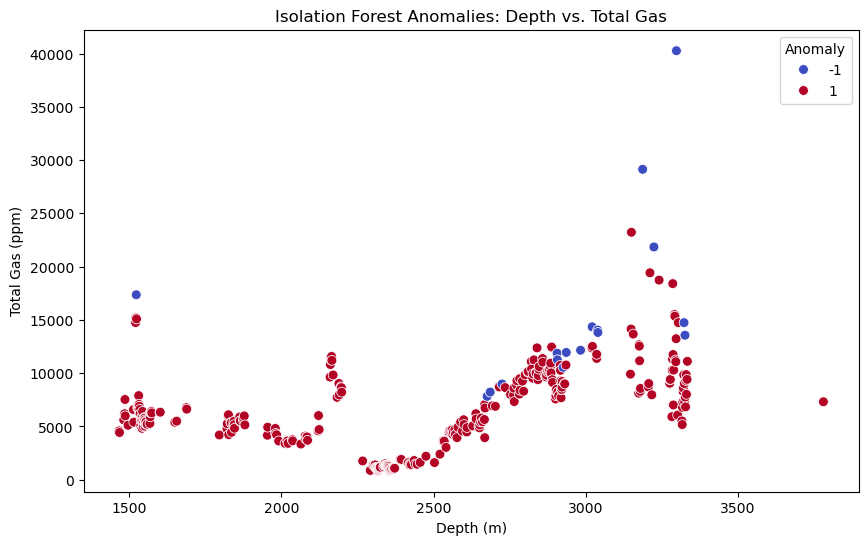

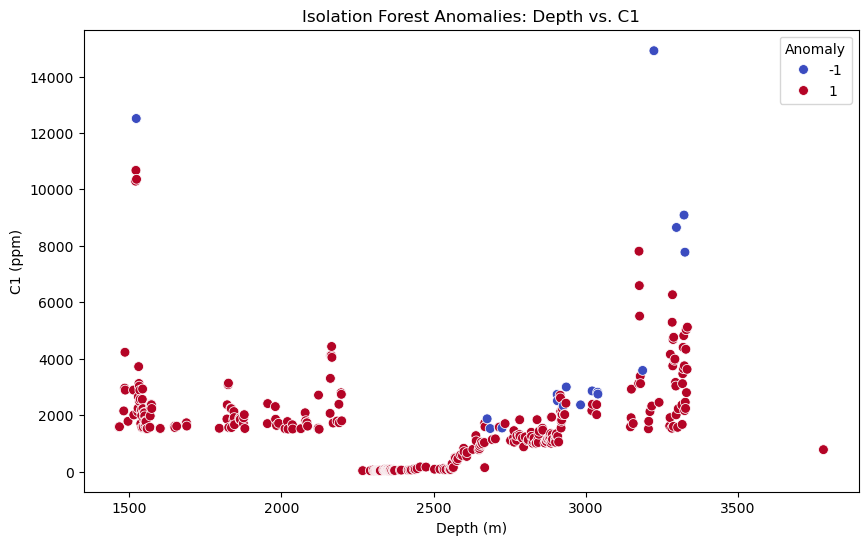

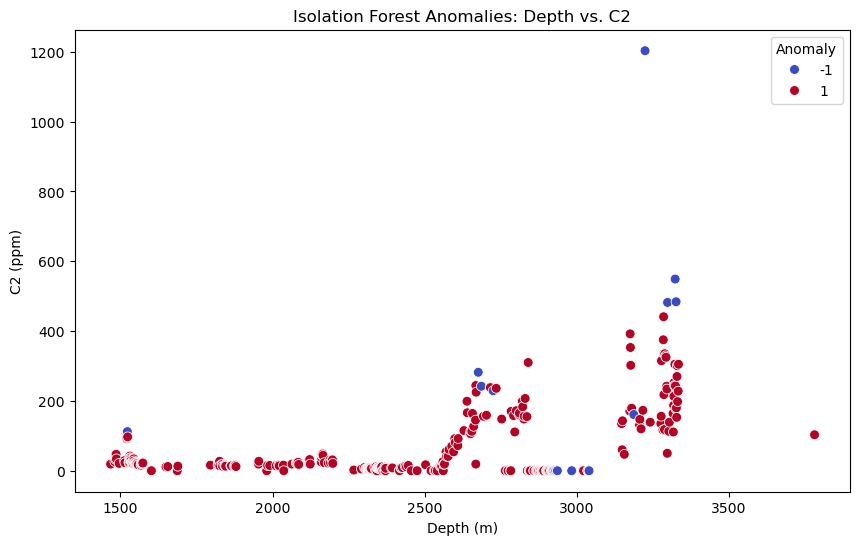

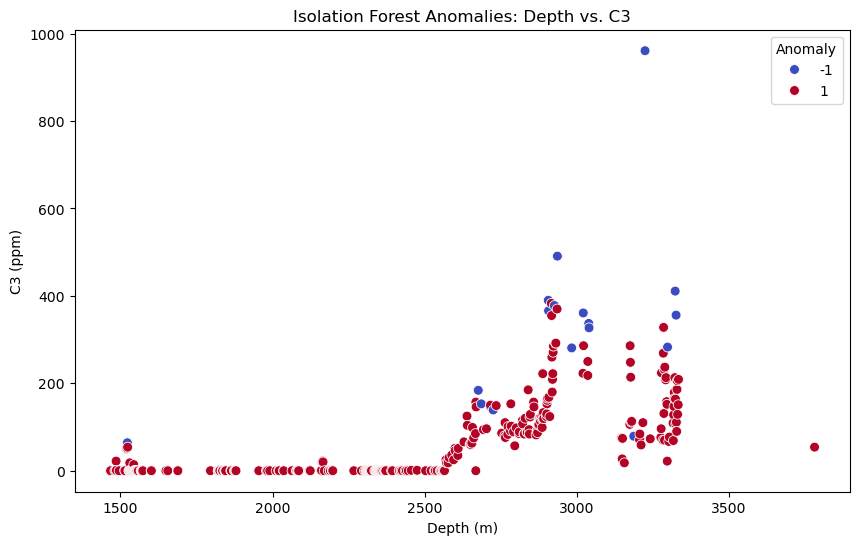

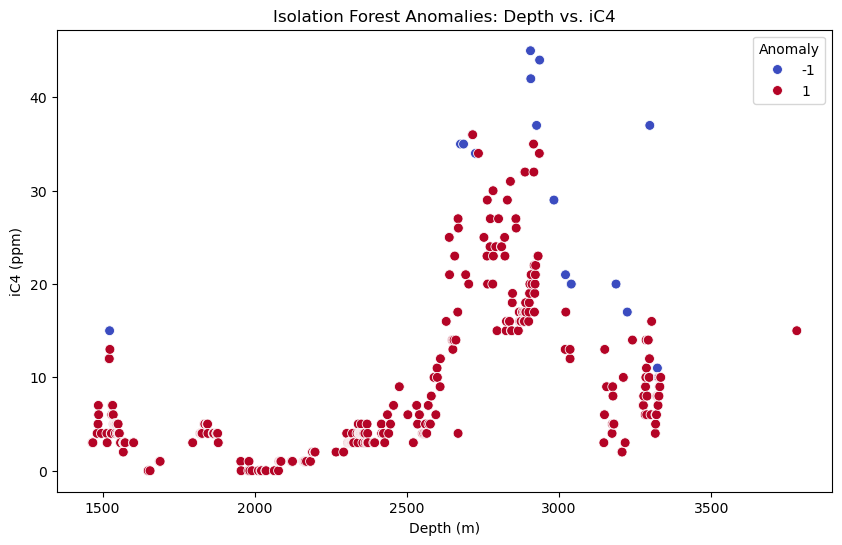

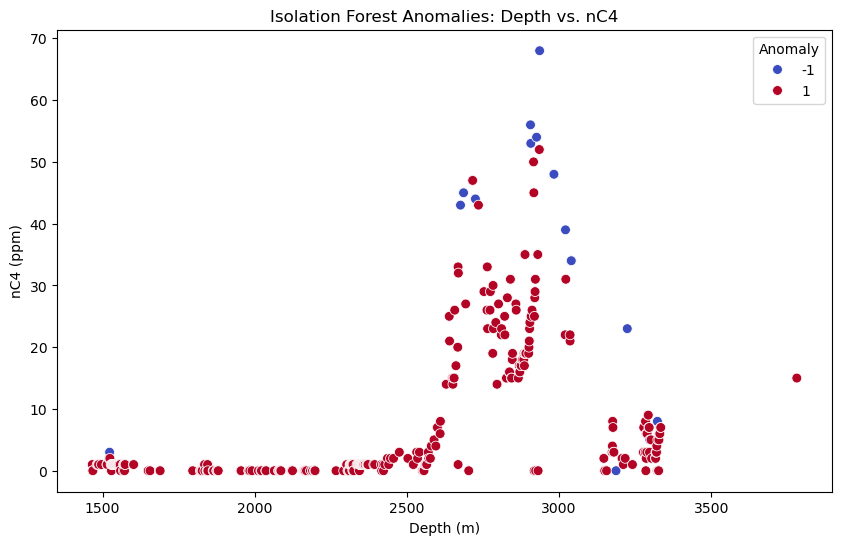

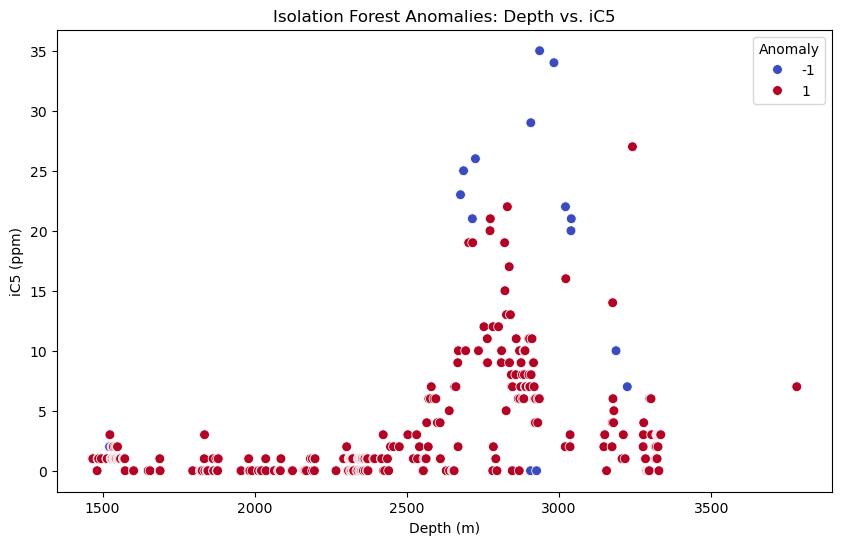

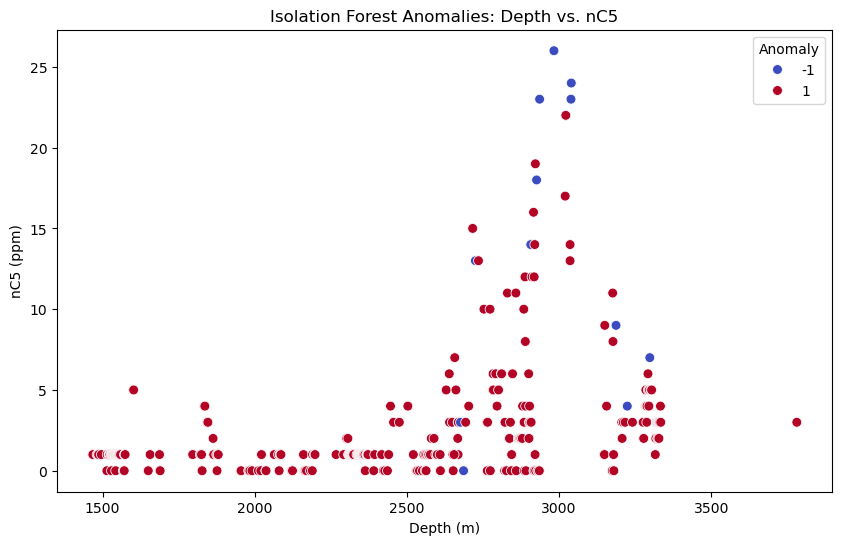

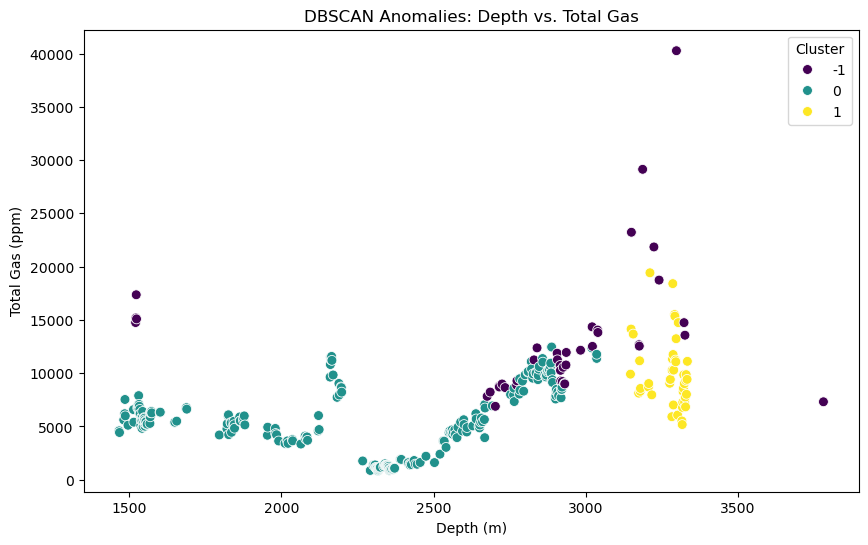

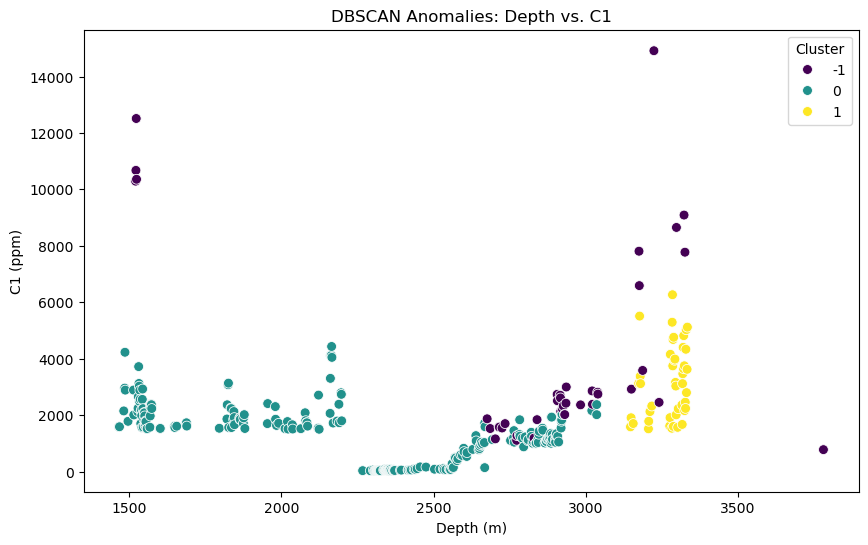

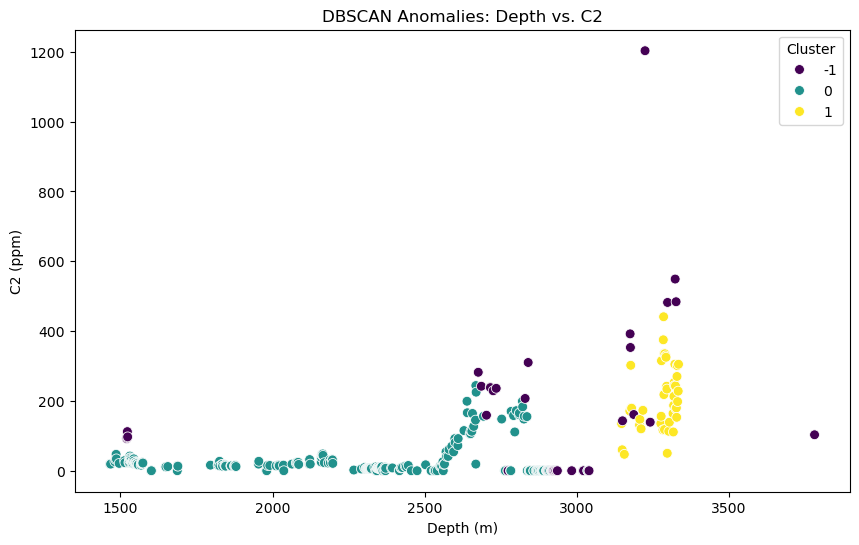

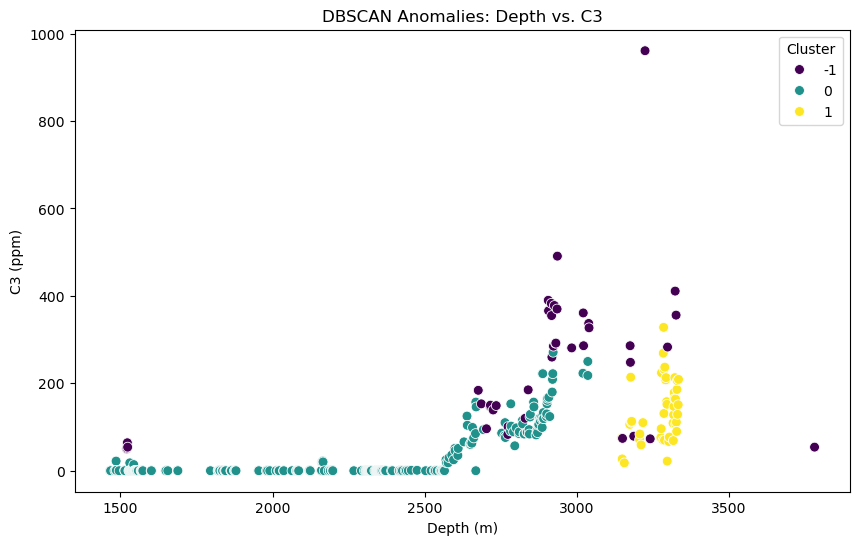

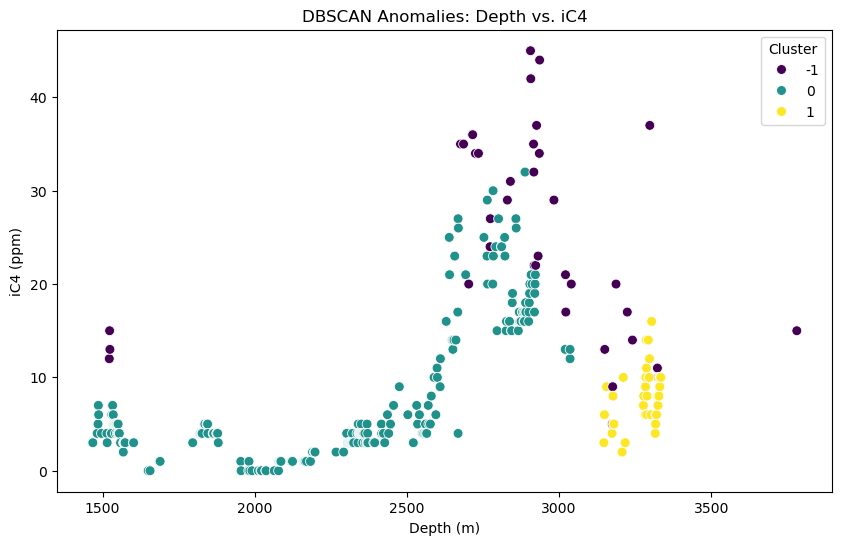

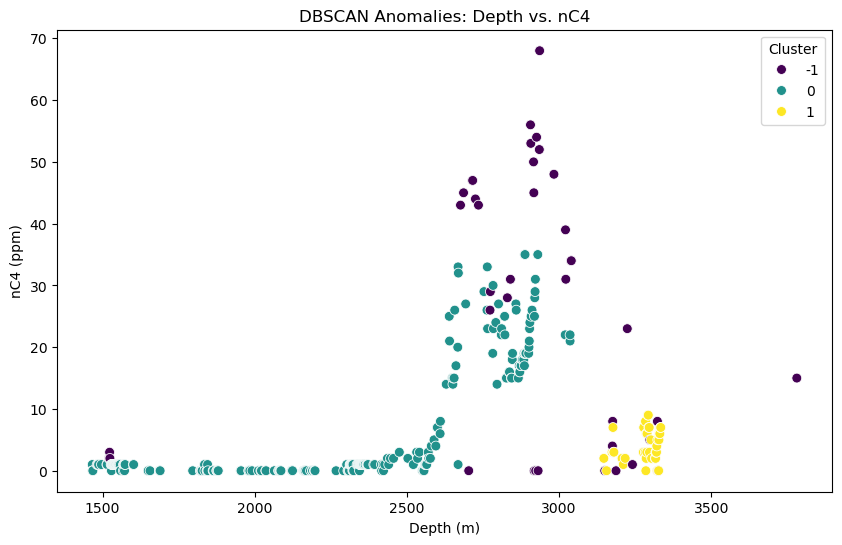

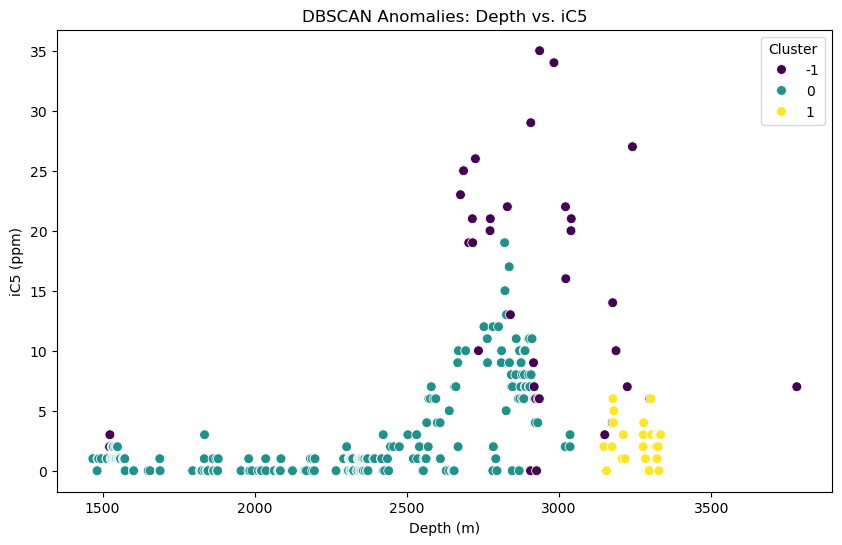

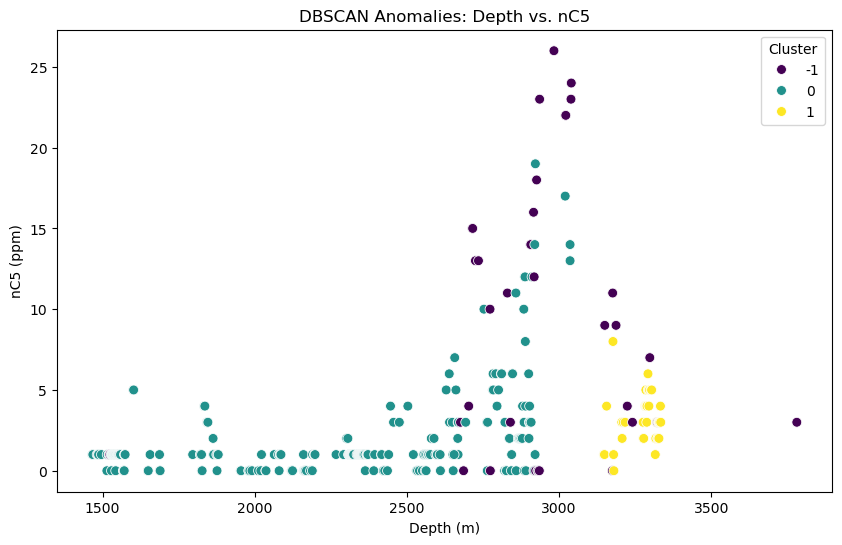

In [51]:
# Visualizing anomalies detected by Isolation Forest for each gas component
components = ['Total Gas', 'C1', 'C2', 'C3', 'iC4', 'nC4', 'iC5', 'nC5']

for component in components:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Depth', y=component, hue='anomaly_if', palette='coolwarm', s=50)
    plt.title(f'Isolation Forest Anomalies: Depth vs. {component}')
    plt.xlabel('Depth (m)')
    plt.ylabel(f'{component} (ppm)')
    plt.legend(title='Anomaly', loc='upper right')
    plt.show()

# Visualizing anomalies detected by DBSCAN for each gas component
for component in components:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Depth', y=component, hue='anomaly_dbscan', palette='viridis', s=50)
    plt.title(f'DBSCAN Anomalies: Depth vs. {component}')
    plt.xlabel('Depth (m)')
    plt.ylabel(f'{component} (ppm)')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()

Number of consistent anomalies detected by both methods: 18


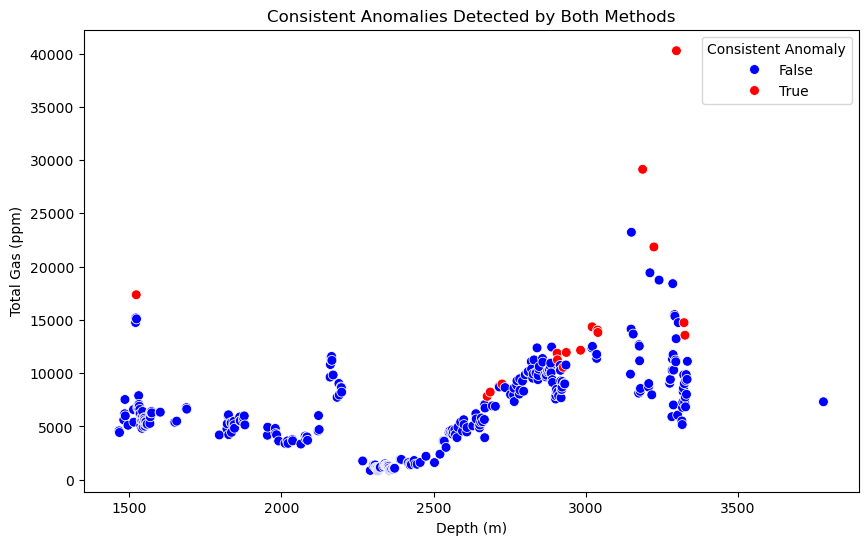

In [53]:
# Identifying consistent anomalies between Isolation Forest and DBSCAN
data['consistent_anomaly'] = (data['anomaly_if'] == -1) & (data['anomaly_dbscan'] == -1)

# Counting consistent anomalies
consistent_anomalies_count = data['consistent_anomaly'].sum()
print(f"Number of consistent anomalies detected by both methods: {consistent_anomalies_count}")

# Visualizing consistent anomalies across Depth vs. Total Gas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='Depth', 
    y='Total Gas', 
    hue='consistent_anomaly', 
    palette={True: 'red', False: 'blue'}, 
    s=50
)
plt.title('Consistent Anomalies Detected by Both Methods')
plt.xlabel('Depth (m)')
plt.ylabel('Total Gas (ppm)')
plt.legend(title='Consistent Anomaly', loc='upper right')
plt.show()

In [57]:
# Filtering rows flagged as anomalies by either method
anomalous_depths = data[(data['anomaly_if'] == -1) | (data['anomaly_dbscan'] == -1)]

# Displaying summary of anomalous depths
print("\nSummary of Anomalous Depths:")
print(anomalous_depths[['Depth', 'Total Gas', 'C1', 'C2', 'C3', 'iC4', 'nC4', 'iC5', 'nC5']])

# Saving anomalous depths to a CSV file for further analysis
anomalous_depths.to_csv("Anomalous_Depths_Summary.csv", index=False)
print("\nAnomalous depths saved to 'Anomalous_Depths_Summary.csv'.")


Summary of Anomalous Depths:
     Depth  Total Gas     C1    C2   C3  iC4  nC4  iC5  nC5
10    1521      14755  10292    92   50   12    2    2    1
11    1522      15191  10674    95   52   12    2    2    1
12    1523      17362  12512   112   64   15    3    2    1
13    1524      15095  10359    97   54   13    2    3    1
206   2676       7830   1870   282  184   35   43   23    3
207   2686       8228   1525   242  153   35   45   25    0
209   2703       6893   1159   159   96   20    0   19    4
210   2715       8768   1578   239  147   36   47   21   15
211   2716       8708   1575   238  150   36   47   19   15
212   2725       8989   1544   229  139   34   44   26   13
213   2735       8652   1699   236  149   34   43   10   13
218   2773       8875   1107     0   83   24   26   20   10
219   2774       9288   1274     0  101   27   29   21    0
220   3781       7318    777   103   54   15   15    7    3
233   2830      11250   1186   207  120   29   28   22   11
236   2840

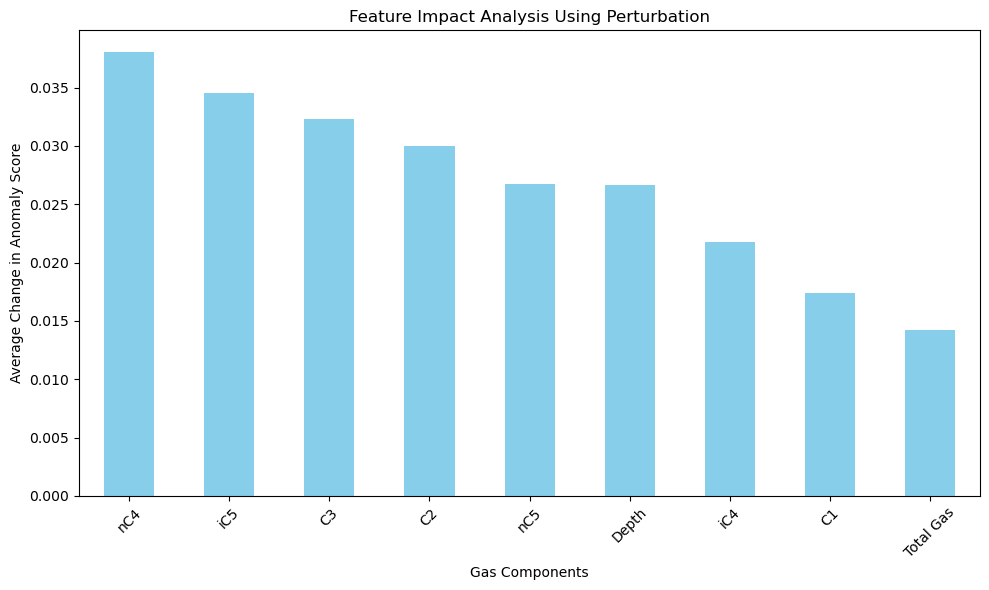

In [63]:
# Analyzing the impact of each feature using feature perturbation
anomaly_scores_original = isolation_forest.decision_function(X_scaled)  # Original anomaly scores
feature_impact = {}

for i, col in enumerate(numeric_cols):
    X_perturbed = X_scaled.copy()
    X_perturbed[:, i] += 1.0  # Slightly perturb the feature
    anomaly_scores_perturbed = isolation_forest.decision_function(X_perturbed)
    feature_impact[col] = np.abs(anomaly_scores_perturbed - anomaly_scores_original).mean()

# Converting feature impacts to a DataFrame
feature_impact_df = pd.DataFrame.from_dict(feature_impact, orient='index', columns=['Impact']).sort_values(by='Impact', ascending=False)

# Visualizing feature impacts
plt.figure(figsize=(10, 6))
feature_impact_df['Impact'].plot(kind='bar', color='skyblue')
plt.title('Feature Impact Analysis Using Perturbation')
plt.xlabel('Gas Components')
plt.ylabel('Average Change in Anomaly Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

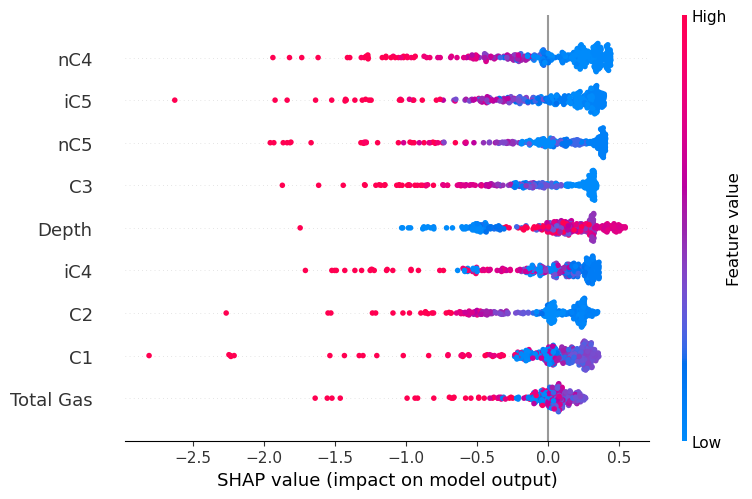

In [65]:
import shap

# SHAP analysis for feature impact
explainer = shap.Explainer(isolation_forest, X_scaled)
shap_values = explainer(X_scaled)

# Visualizing SHAP summary plot
shap.summary_plot(shap_values, X_scaled, feature_names=numeric_cols)

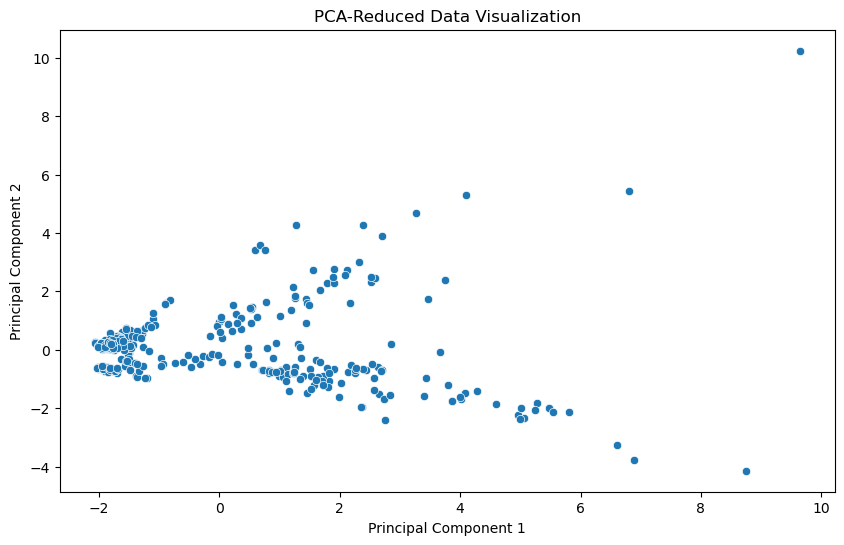

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


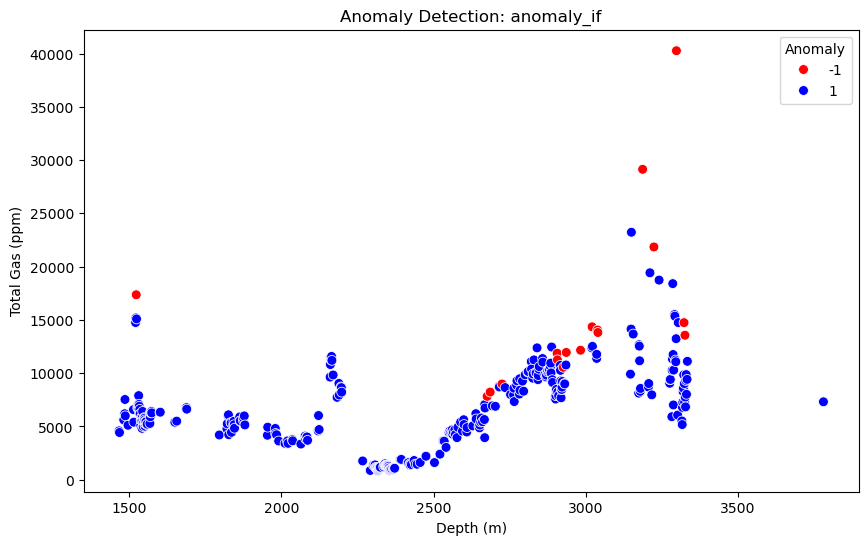

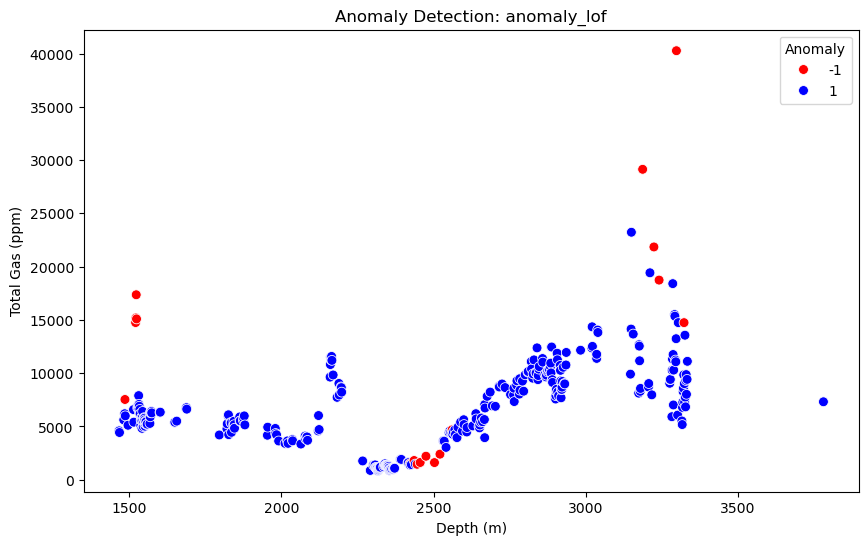

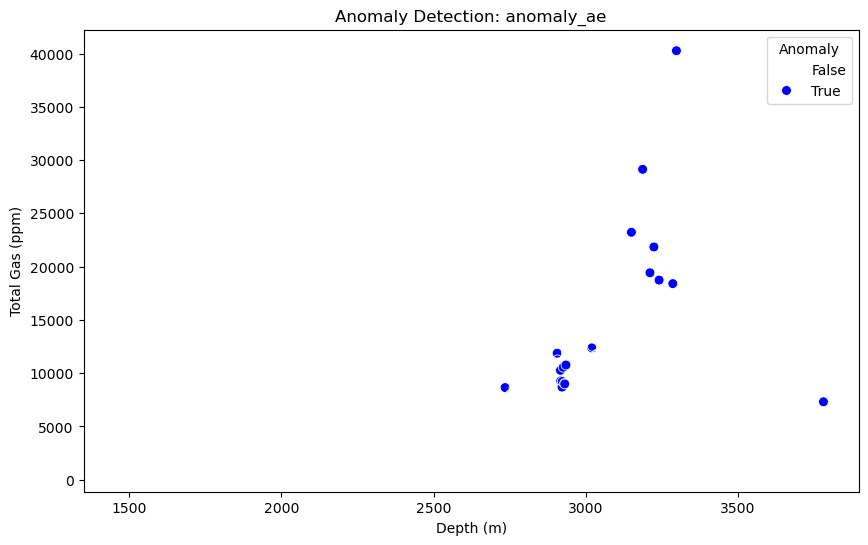

Silhouette Score for LOF: 0.34
Results saved to 'Advanced_Anomaly_Detection_Results.csv'


In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
url = "https://raw.githubusercontent.com/amolsriv/Oil-and-Gas-Projects/main/GAS%20Peaks-Drilling_Well.csv"
data = pd.read_csv(url)

# Rename columns
data.columns = ['Depth', 'Total Gas', 'C1', 'C2', 'C3', 'iC4', 'nC4', 'iC5', 'nC5', 'Gas Type']

# Convert numeric columns to appropriate data types
numeric_cols = ['Depth', 'Total Gas', 'C1', 'C2', 'C3', 'iC4', 'nC4', 'iC5', 'nC5']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_cols])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA-reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('PCA-Reduced Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data['anomaly_if'] = isolation_forest.fit_predict(X_scaled)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data['anomaly_lof'] = lof.fit_predict(X_scaled)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
data['gmm_probs'] = gmm.fit_predict(X_scaled)

# Autoencoder for anomaly detection
# Define the Autoencoder
autoencoder = Sequential([
    Dense(32, activation='relu', input_dim=X_scaled.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_scaled.shape[1], activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Compute reconstruction error
reconstructions = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Set threshold for anomalies based on reconstruction error
threshold = np.percentile(reconstruction_error, 95)  # Top 5% considered anomalies
data['anomaly_ae'] = reconstruction_error > threshold

# Visualization: Depth vs. Total Gas for each method
methods = ['anomaly_if', 'anomaly_lof', 'anomaly_ae']

for method in methods:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Depth', y='Total Gas', hue=method, palette={1: 'blue', -1: 'red'}, s=50)
    plt.title(f'Anomaly Detection: {method}')
    plt.xlabel('Depth (m)')
    plt.ylabel('Total Gas (ppm)')
    plt.legend(title='Anomaly', loc='upper right')
    plt.show()

# Evaluation: Silhouette Score
if len(set(data['anomaly_lof'])) > 1:
    silhouette_avg = silhouette_score(X_scaled, data['anomaly_lof'])
    print(f"Silhouette Score for LOF: {silhouette_avg:.2f}")

# Save the results
data.to_csv("Advanced_Anomaly_Detection_Results.csv", index=False)
print("Results saved to 'Advanced_Anomaly_Detection_Results.csv'")